# MNIST with ANN

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Download Dataset

In [4]:
# MNIST Images to Tensors
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root="./Data", train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 382886321.72it/s]

Extracting ./Data/MNIST/raw/train-images-idx3-ubyte.gz to ./Data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 24116204.23it/s]


Extracting ./Data/MNIST/raw/train-labels-idx1-ubyte.gz to ./Data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 133663659.31it/s]

Extracting ./Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 19262415.34it/s]


Extracting ./Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Data/MNIST/raw



In [6]:
test_data = datasets.MNIST(root="./Data", train=False, download=True, transform=transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./Data
    Split: Test
    StandardTransform
Transform: ToTensor()

## Display Images

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
type(train_data[0])

tuple

In [11]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
image, label = train_data[0]

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
label

5

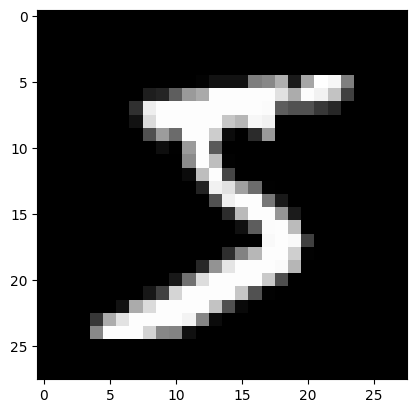

In [15]:
plt.imshow(image.reshape(28,28,1), cmap="gray")

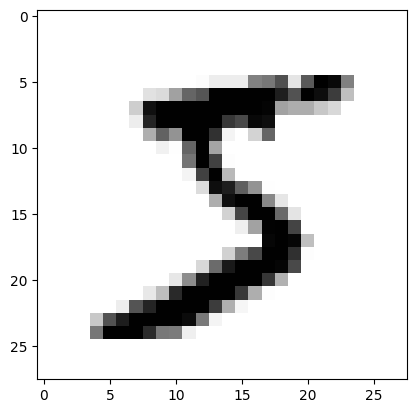

In [16]:
plt.imshow(image.reshape(28,28,1), cmap="gray_r")

## Load Batches

In [17]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [18]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f"{x:4}")) # Formatting

In [19]:
# First Batch    60,000 / 100 = 600 batches
for images, labels in train_loader:
  break

In [20]:
images.shape

torch.Size([100, 1, 28, 28])

In [21]:
len(images)

100

In [22]:
labels.shape

torch.Size([100])

### Show 12 images with grid

Labels [   7    2    3    5    8    5    3    6    9    9    1    3]


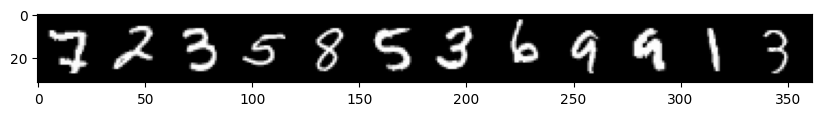

In [23]:
# Print the first 12 labels
print("Labels", labels[0:12].numpy())

# Print the first 12 images
image = make_grid(images[0:12], nrow=12)
plt.figure(figsize=(10,4))
# transpose the images from CWH to WHC
plt.imshow(np.transpose(image.numpy(), (1,2,0)))

In [24]:
img = images[0]

In [25]:
img.shape

torch.Size([1, 28, 28])

In [26]:
img_0 = np.transpose(img, (1,2,0))

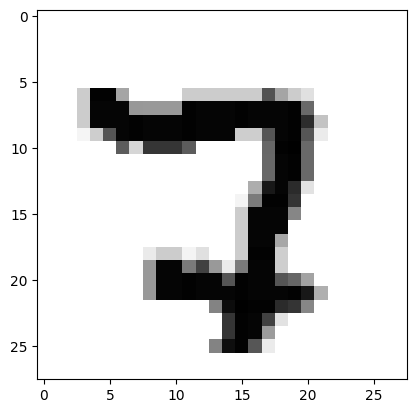

In [27]:
plt.imshow(img_0, cmap="gray_r")

## Define Model

In [28]:
class MultiLayerPerceptron(nn.Module):

  def __init__(self, in_size=784, out_size=10, layers=[120,84]):

    super().__init__()

    self.fc1 = nn.Linear(in_size, layers[0])
    self.fc2 = nn.Linear(layers[0], layers[1])
    self.fc3 = nn.Linear(layers[1], out_size)


  def forward(self, X):

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)  # Multi Class Classification


In [29]:
torch.manual_seed(101)
model = MultiLayerPerceptron()

In [30]:
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [31]:
for param in model.parameters():
  print(param.numel())

94080
120
10080
84
840
10


In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Flatten Train

In [33]:
images.shape

torch.Size([100, 1, 28, 28])

In [34]:
images.reshape(100,-1).shape

torch.Size([100, 784])

In [35]:
images.view(100,-1).shape

torch.Size([100, 784])

In [36]:
images.shape

torch.Size([100, 1, 28, 28])

## Train Model

In [37]:
import time

start_time = time.time()

# Training

epochs = 10

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):

    b += 1

    y_pred = model(X_train.view(100,-1))
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%200 == 0:
      acc = trn_corr.item()*100/(100*b)
      print(f"Epoch {i} batch{b} loss:{loss.item()} accuracy:{acc}")

  train_losses.append(loss)
  train_correct.append(trn_corr)

  with torch.no_grad():

    for b,(X_test, y_test) in enumerate(test_loader):

      y_val = model(X_test.view(500,-1))

      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


total_time = time.time() - start_time
print(f"Duration: {total_time/60} mins")

Epoch 0 batch200 loss:0.23541302978992462 accuracy:83.25
Epoch 0 batch400 loss:0.3537280559539795 accuracy:87.5275
Epoch 0 batch600 loss:0.13648737967014313 accuracy:89.57333333333334
Epoch 1 batch200 loss:0.24467909336090088 accuracy:94.805
Epoch 1 batch400 loss:0.14542999863624573 accuracy:95.0625
Epoch 1 batch600 loss:0.07299500703811646 accuracy:95.35666666666667
Epoch 2 batch200 loss:0.08716943860054016 accuracy:96.5
Epoch 2 batch400 loss:0.0669819787144661 accuracy:96.595
Epoch 2 batch600 loss:0.0688866600394249 accuracy:96.67833333333333
Epoch 3 batch200 loss:0.11654192209243774 accuracy:97.67
Epoch 3 batch400 loss:0.0588822178542614 accuracy:97.4975
Epoch 3 batch600 loss:0.03282598406076431 accuracy:97.51333333333334
Epoch 4 batch200 loss:0.11771348863840103 accuracy:98.185
Epoch 4 batch400 loss:0.045562487095594406 accuracy:98.03
Epoch 4 batch600 loss:0.04847530275583267 accuracy:98.02833333333334
Epoch 5 batch200 loss:0.008836661465466022 accuracy:98.395
Epoch 5 batch400 loss

## Validation

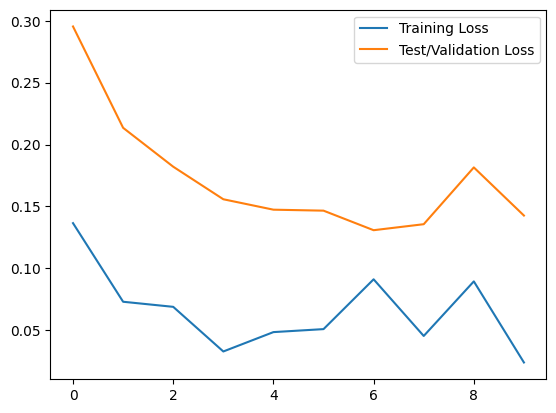

In [50]:
plt.plot(torch.Tensor(train_losses), label="Training Loss")
plt.plot(torch.Tensor(test_losses),  label="Test/Validation Loss")
plt.legend()

In [53]:
train_correct

[tensor(53744),
 tensor(57214),
 tensor(58007),
 tensor(58508),
 tensor(58817),
 tensor(59053),
 tensor(59212),
 tensor(59365),
 tensor(59470),
 tensor(59568)]

In [57]:
train_acc = [t/600 for t in train_correct]

In [58]:
train_acc

[tensor(89.5733),
 tensor(95.3567),
 tensor(96.6783),
 tensor(97.5133),
 tensor(98.0283),
 tensor(98.4217),
 tensor(98.6867),
 tensor(98.9417),
 tensor(99.1167),
 tensor(99.2800)]

In [56]:
test_correct

[tensor(9436),
 tensor(9594),
 tensor(9694),
 tensor(9705),
 tensor(9756),
 tensor(9758),
 tensor(9775),
 tensor(9776),
 tensor(9750),
 tensor(9774)]

In [59]:
test_acc = [t/100 for t in test_correct]

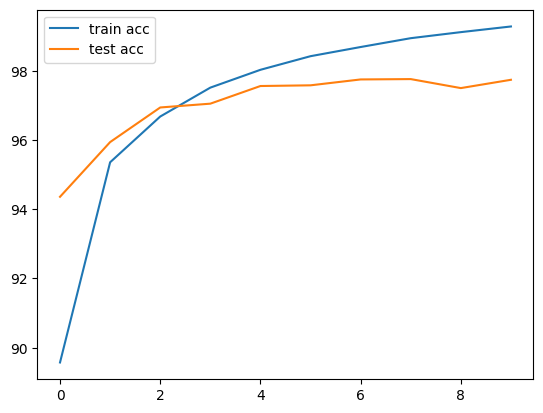

In [60]:
plt.plot(train_acc, label="train acc")
plt.plot(test_acc, label="test acc")
plt.legend()

## New Unseen Dataset

In [61]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [62]:
with torch.no_grad():
  correct = 0

  for X_test, y_test in test_load_all:

    y_val = model(X_test.view(len(X_test), -1))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [63]:
correct

tensor(9774)

In [67]:
correct.item()

9774

In [68]:
correct.numel()

1

In [69]:
correct.item()/len(test_data)

0.9774

In [70]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 971,    0,    3,    0,    1,    2,    5,    2,    4,    2],
       [   0, 1123,    3,    0,    0,    0,    3,    6,    0,    2],
       [   1,    3, 1001,    2,    1,    0,    1,    8,    4,    0],
       [   2,    2,    7,  989,    0,    9,    1,    4,    3,    4],
       [   1,    0,    3,    0,  965,    2,    4,    3,    3,   10],
       [   0,    0,    0,    8,    0,  865,    3,    1,    3,    2],
       [   1,    2,    1,    0,    6,    4,  940,    1,    1,    0],
       [   0,    0,    4,    4,    1,    0,    0,  985,    2,    0],
       [   3,    5,   10,    2,    0,    7,    1,    2,  949,    3],
       [   1,    0,    0,    5,    8,    3,    0,   16,    5,  986]])

tensor([7, 2, 1,  ..., 4, 5, 6])